<a href="https://colab.research.google.com/github/cleysonl/Pytorch/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN MNIST with PyTorch**

In [15]:
!pip install torch torchvision

In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

## **Initializing GPU usage**

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## **Transformations**

In [0]:
transform = transforms.Compose([transforms.Resize((28,28)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5, ), (0.5, ))
                                 ])

training_dataset = datasets.MNIST(root = './data', train = True, download = True, transform = transform)
validation_dataset = datasets.MNIST(root = './data', train = False, download = True, transform = transform)

#Loaders
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size = 100, shuffle = True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle = True)


## **Numpy Image Conversion Function**

In [0]:
def im_convert(tensor):
  image = tensor.cpu().clone().detach().numpy() 
  image = image.transpose(1,2,0) # (28,28,1)
  image = image[:,:,0]
  image = image.clip(0,1)
  return image

## **Plotting Image Data**

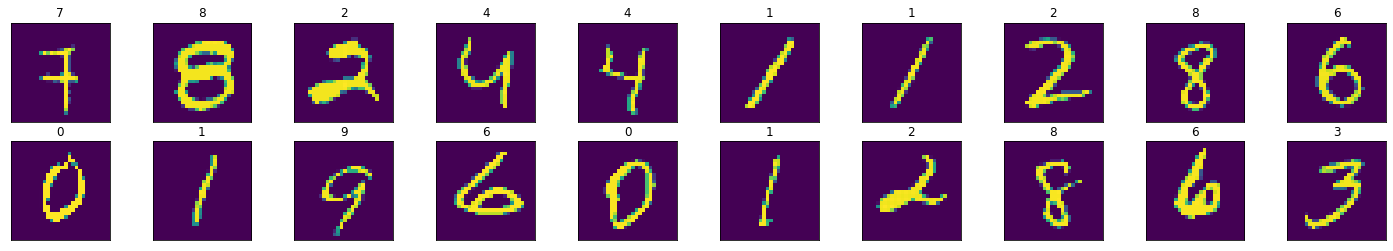

In [20]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title(labels[idx].item())

## **Model Class Constructor**

In [0]:
class LeNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 20, 5, 1)
    self.conv2 = nn.Conv2d(20, 50, 5, 1)
    self.fc1 = nn.Linear(4*4*50, 500)
    self.dropout1 = nn.Dropout(0.5)
    self.fc2 = nn.Linear(500,10)
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x, 2, 2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x, 2, 2)
    x = x.view(-1, 4*4*50)
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x= self.fc2(x)
    return x

In [22]:
model = LeNet().to(device)
model

LeNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

## **Loss and Optimizer**

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

## **Training Process**

In [24]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_inputs)
        val_loss = criterion(val_outputs, val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
  
    print('epoch :', (e+1))
    print('training loss: {:.4f}, acc {:.4f} '.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, validation acc {:.4f} '.format(val_epoch_loss, val_epoch_acc.item()))


epoch : 1
training loss: 0.5530, acc 85.3167 
validation loss: 0.1727, validation acc 95.3300 
epoch : 2
training loss: 0.1445, acc 95.7867 
validation loss: 0.1023, validation acc 96.8300 
epoch : 3
training loss: 0.0974, acc 97.0733 
validation loss: 0.0792, validation acc 97.5500 
epoch : 4
training loss: 0.0773, acc 97.6767 
validation loss: 0.0580, validation acc 98.1800 
epoch : 5
training loss: 0.0636, acc 98.0750 
validation loss: 0.0555, validation acc 98.2400 
epoch : 6
training loss: 0.0562, acc 98.3050 
validation loss: 0.0477, validation acc 98.5500 
epoch : 7
training loss: 0.0485, acc 98.5083 
validation loss: 0.0422, validation acc 98.5700 
epoch : 8
training loss: 0.0440, acc 98.6733 
validation loss: 0.0396, validation acc 98.7700 
epoch : 9
training loss: 0.0389, acc 98.8417 
validation loss: 0.0384, validation acc 98.7600 
epoch : 10
training loss: 0.0362, acc 98.8817 
validation loss: 0.0362, validation acc 98.7800 
epoch : 11
training loss: 0.0329, acc 98.9783 
va

## **Plot Training and Validation Loss**

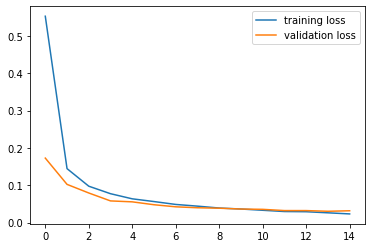

In [25]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label = 'validation loss')
plt.legend()

## **Plotting Accuracy**

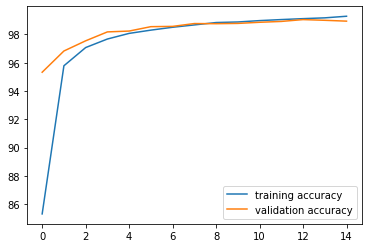

In [26]:
plt.plot(running_corrects_history, label = 'training accuracy')
plt.plot(val_running_corrects_history, label = 'validation accuracy')
plt.legend()